In [1]:
import pandas as pd 
from sklearn.metrics import roc_auc_score
from sklearn import linear_model


In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

In [3]:
import scikitplot as skplt

In [4]:
import sklearn as sk 

In [5]:
from sklearn.model_selection  import train_test_split

In [6]:
# Import the scikitplot module
import scikitplot as skplt

In [7]:
#import data file set up is basetable
basetable = pd.read_csv('type_smells_2.csv')

In [8]:
basetable

,url,commit,parents,java s112,java s112.1,java s119,java s119.1,java:S106,java:S106.1,java s1068,...,sum_smells_open_commit,sum_smell_closed,remove_smell,open_time,closed_time,time,changed_file,additions,deletions,Dev
0,https://github.com/apache/flink/pull/2342,58165d69fb,73c73e92750a,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,5,-3,9/1/2015 22:25,8/24/2016 17:09,18:43:45,45,429,253,1
1,https://github.com/apache/flink/pull/5947,5ac4d2960984,a4afe2fe9,0.0,0.0,8.0,0.0,1.0,0.0,0.0,...,9,8,-1,2/5/2018 4:58,4/5/2018 21:07,16:09:00,15,843,327,2
2,https://github.com/apache/flink/pull/470,b0b12952c,84b04beba,4.0,0.0,0.0,0.0,0.0,4.0,0.0,...,7,7,0,9/9/2014 16:16,1/8/2015 23:40,7:23:36,9,326,148,1
3,https://github.com/apache/flink/commit/a3e2ae47d9,a3e2ae47d9,4497e96b9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17,1,-16,3/16/2021 20:12,3/24/2021 19:29,23:16:43,5,127,79,2
4,https://github.com/apache/flink/commit/42ada8a...,ce345e394df,42ada8ad9ca28,2.0,3.0,0.0,8.0,0.0,0.0,0.0,...,2,14,12,7/9/2018 17:02,7/13/2018 2:03,9:01:02,9,955,36,2
5,https://github.com/apache/flink/commit/1162caca85,fa75af096f,1162caca85,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,1,-9,8/3/2014 2:19,8/18/2014 21:22,19:03:30,32,249,1180,2
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34,23,11,NaN,NaN,18:34:33,12,156,78,1
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,11,-7,NaN,NaN,156:38:38,32,567,424,2
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,4,-2,NaN,NaN,38:43:30,14,132,59,1
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12,13,-1,NaN,NaN,84:44:30,17,156,257,1


In [9]:
logreg = linear_model.LogisticRegression()
logreg

LogisticRegression()

In [11]:
# Create a dataframe x is perdiction

x = basetable[['sum_smells_open_commit',
                'sum_smell_closed',
                'remove_smell',
                'changed_file',
                'additions',
                'deletions',
                'Dev']]

In [12]:
# Create a dataframe y is
y = basetable[["time"]]

In [13]:
#
logreg = linear_model.LogisticRegression()
logreg.fit(x, y)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# Assign the coefficients to a list coef
coef = logreg.coef_
for p,c in zip(x,list(coef[0])):
    print(p + '\t' + str(c))

sum_smells_open_commit	0.35324294935252143
sum_smell_closed	0.09182995393889436
remove_smell	0.2699585566262459
changed_file	0.11814349372557675
additions	0.1326649666976758
deletions	-0.0612530362192365
Dev	0.026218079888817476


In [15]:
# Assign the intercept to the variable intercept
intercept = logreg.intercept_
print(intercept)

[ 0.03745017  0.00835492 -0.00072076 -0.01086671 -0.01268712 -0.00017336
 -0.03272019 -0.01083233  0.04782121  0.00228439 -0.01162394  0.00537541
 -0.03412374  0.00959498 -0.00880136  0.00180361 -0.01748754 -0.0117974
  0.00141129  0.02273117 -0.00568445 -0.00015     0.01449403  0.02912944
 -0.01050564 -0.00663754 -0.0037314  -0.00216476  0.00374034 -0.00348272]


In [16]:
# Make a prediction for each observation
predictions = logreg.predict_proba(x)
print(predictions[0:5])

[[3.23224708e-010 1.24619820e-003 1.15618470e-002 5.62911351e-003
  1.59491315e-007 1.21585480e-007 2.42485225e-007 4.98785469e-014
  4.77450983e-031 2.51632683e-011 9.73490023e-001 2.99474847e-014
  7.51912326e-135 4.27709777e-004 2.45128886e-013 2.10652641e-052
  2.88884610e-034 1.41662494e-018 4.79136021e-095 3.84236172e-003
  1.59797085e-048 2.90216638e-086 2.77687691e-011 1.39299727e-144
  6.62375844e-013 4.40114572e-007 3.80178281e-003 4.86216759e-056
  7.29100528e-037 1.13532718e-072]
 [1.17916420e-044 6.82538669e-026 2.52264154e-017 2.41166342e-025
  4.37781032e-043 6.44642735e-037 5.40327721e-049 9.95597594e-001
  1.14965447e-105 1.14713898e-025 6.31291939e-023 1.94130891e-007
  2.63010184e-315 6.99147267e-021 6.24384406e-059 7.52832760e-155
  3.32068085e-107 3.37337634e-082 1.48776270e-245 4.42801187e-005
  4.38531976e-140 8.02310971e-231 1.99457152e-053 0.00000000e+000
  4.86289983e-061 5.46566430e-015 4.35793135e-003 7.35092470e-168
  4.04366914e-121 8.52322235e-066]
 [2.51

In [17]:
df  = pd.read_csv("type_smells_2.csv")
df

,url,commit,parents,java s112,java s112.1,java s119,java s119.1,java:S106,java:S106.1,java s1068,...,sum_smells_open_commit,sum_smell_closed,remove_smell,open_time,closed_time,time,changed_file,additions,deletions,Dev
0,https://github.com/apache/flink/pull/2342,58165d69fb,73c73e92750a,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,5,-3,9/1/2015 22:25,8/24/2016 17:09,18:43:45,45,429,253,1
1,https://github.com/apache/flink/pull/5947,5ac4d2960984,a4afe2fe9,0.0,0.0,8.0,0.0,1.0,0.0,0.0,...,9,8,-1,2/5/2018 4:58,4/5/2018 21:07,16:09:00,15,843,327,2
2,https://github.com/apache/flink/pull/470,b0b12952c,84b04beba,4.0,0.0,0.0,0.0,0.0,4.0,0.0,...,7,7,0,9/9/2014 16:16,1/8/2015 23:40,7:23:36,9,326,148,1
3,https://github.com/apache/flink/commit/a3e2ae47d9,a3e2ae47d9,4497e96b9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17,1,-16,3/16/2021 20:12,3/24/2021 19:29,23:16:43,5,127,79,2
4,https://github.com/apache/flink/commit/42ada8a...,ce345e394df,42ada8ad9ca28,2.0,3.0,0.0,8.0,0.0,0.0,0.0,...,2,14,12,7/9/2018 17:02,7/13/2018 2:03,9:01:02,9,955,36,2
5,https://github.com/apache/flink/commit/1162caca85,fa75af096f,1162caca85,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,1,-9,8/3/2014 2:19,8/18/2014 21:22,19:03:30,32,249,1180,2
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34,23,11,NaN,NaN,18:34:33,12,156,78,1
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,11,-7,NaN,NaN,156:38:38,32,567,424,2
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,4,-2,NaN,NaN,38:43:30,14,132,59,1
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12,13,-1,NaN,NaN,84:44:30,17,156,257,1


In [18]:
#take function use variable, the target, and the base table as an argument
def auc(variable , target , basetable):
    x1 = basetable[variable]
    y1 = basetable[target]
    logreg =linear_model.LogisticRegression()
    logreg.fit(x1 ,y1)
    #multi class 
    #preds = logreg.predict_proba(x1)
    #roc_auc = roc_auc_score(y1,preds,multi_class='ovr')
    predictions = logreg.predict_log_proba(x1)[:,1]
    auc = roc_auc_score(y1 , predictions)
    return(auc)

In [19]:
predictions = logreg.predict_log_proba(x)
auc = roc_auc_score(y, predictions )
print(round(auc,2))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1499: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [20]:
#data 2 catitory
variables_1 = ['sum_smells_open_commit',
                'sum_smell_closed',
                'remove_smell']

In [21]:
variables_2 = ['changed_file',
                'additions',
                'deletions',
                'Dev']

In [22]:
X_1 = basetable[variables_1]
X_2 = basetable[variables_2]
y = basetable[["time"]]

In [23]:
logreg = linear_model.LogisticRegression()

In [24]:
logreg.fit(X_1, y)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
predictions_1 = logreg.predict_proba(X_1)[:,1]
predictions_1

array([6.75344481e-02, 6.04515869e-02, 1.67098799e-01, 3.96176065e-09,
       2.89933748e-02, 3.40822725e-04, 6.47296454e-09, 1.39491481e-03,
       8.16285502e-02, 2.71014614e-03, 1.52645355e-02, 8.16285502e-02,
       1.19663533e-08, 7.28961762e-17, 2.83726930e-01, 2.28311034e-03,
       1.20964504e-04, 6.67257787e-02, 1.61767614e-03, 4.63535078e-17,
       1.67154982e-08, 1.19452215e-07, 1.91740258e-02, 7.25128648e-05,
       1.21452922e-02, 1.78093980e-01, 4.05343986e-04, 2.22492450e-05,
       4.09434809e-30, 8.71248720e-20])

In [ ]:
#auc = roc_auc_score(y,predictions_1)

In [26]:
# Create dataframes with variables and target
x_set = basetable.drop("time", 1)

In [27]:
y = basetable["time"]

In [28]:
# Carry out 70-30 partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split( x_set, y, test_size = 0.33, random_state=42)

In [29]:
# Create the final train and test basetables
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [41]:
train

,url,commit,parents,java s112,java s112.1,java s119,java s119.1,java:S106,java:S106.1,java s1068,...,sum_smells_open_commit,sum_smell_closed,remove_smell,open_time,closed_time,changed_file,additions,deletions,Dev,time
4,https://github.com/apache/flink/commit/42ada8a...,ce345e394df,42ada8ad9ca28,2.0,3.0,0.0,8.0,0.0,0.0,0.0,...,2,14,12,7/9/2018 17:02,7/13/2018 2:03,9,955,36,2,9:01:02
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24,14,10,NaN,NaN,52,345,132,2,63:34:12
5,https://github.com/apache/flink/commit/1162caca85,fa75af096f,1162caca85,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,1,-9,8/3/2014 2:19,8/18/2014 21:22,32,249,1180,2,19:03:30
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12,34,-22,NaN,NaN,28,45,178,1,43:23:59
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,4,-2,NaN,NaN,13,23,153,1,56:34:96
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17,8,9,NaN,NaN,23,231,134,1,12:34:34
1,https://github.com/apache/flink/pull/5947,5ac4d2960984,a4afe2fe9,0.0,0.0,8.0,0.0,1.0,0.0,0.0,...,9,8,-1,2/5/2018 4:58,4/5/2018 21:07,15,843,327,2,16:09:00
2,https://github.com/apache/flink/pull/470,b0b12952c,84b04beba,4.0,0.0,0.0,0.0,0.0,4.0,0.0,...,7,7,0,9/9/2014 16:16,1/8/2015 23:40,9,326,148,1,7:23:36
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12,4,8,NaN,NaN,7,58,45,1,11:38:31
3,https://github.com/apache/flink/commit/a3e2ae47d9,a3e2ae47d9,4497e96b9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17,1,-16,3/16/2021 20:12,3/24/2021 19:29,5,127,79,2,23:16:43


In [30]:
variables = ['sum_smells_open_commit',
                'sum_smell_closed',
                'remove_smell',
                'changed_file',
                'additions'
                'deletions',
                'Dev']

In [32]:
# Keep track of train and test AUC values
auc_values_train = []
auc_values_test = []

In [33]:
#add variables
variables_evaluate = []

In [34]:

auc_train_test = auc( variables , ["time"], basetable)
print(round(auc_train_test,2))

KeyError: "['additionsdeletions'] not in index"

In [35]:
#loop variables 
for v in variables:
    variables_evaluate.append(v)
    # 
    auc_train, auc_test = auc_train_test(variables_evaluate, ["time"], train, test)
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)

NameError: name 'auc_train_test' is not defined

In [ ]:
 #Make plot of the AUC values

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (6).

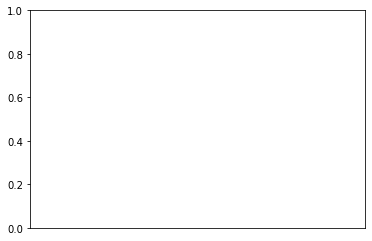

In [36]:
x = np.array(range(0,len(auc_values_train)))

y_train = np.array(auc_values_train)
y_test = np.array(auc_values_test)

plt.xticks(x, variables, rotation = 90)
plt.plot(x,y_train)
plt.plot(x,y_test)
plt.ylim((0.6, 0.8))
plt.show()

In [38]:
random_predictions = [random.uniform(0,1) for _ in range(len(targets_test))]

NameError: name 'targets_test' is not defined

In [40]:
# Plot the lift curve
skplt.metrics.plot_lift_curve(targets_test , predictions_test)
plt.show()

NameError: name 'targets_test' is not defined